# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Set Parameters

In [4]:
sample_space = 1_000_000 #ความเป็นไปได้จากตัวเลขทั้งหมด 6 หลัก
prizes = [6_000_000,200_000,80_000,40_000,20_000,100_000,4000,4000,2000] #จำนวนเงินที่ได้ของแต่ละรางวัล
n_prize = [1,5,10,50,100,2,2000,2000,10_000] #จำนวนรางวัลของแต่ละรางวัล
probabilities = [x/sample_space for x in n_prize] #โอกาสชนะของแต่ละรางวัล

ticket_price = 80 #ราคาสลากกินแบ่ง

In [3]:
probabilities

[1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 2e-06, 0.002, 0.002, 0.01]

# Insights

In [11]:
print(f"ความน่าจะเป็นที่จะถูกอย่างน้อย 1 รางวัล = {sum(probabilities)}")

ความน่าจะเป็นที่จะถูกอย่างน้อย 1 รางวัล = 0.014168


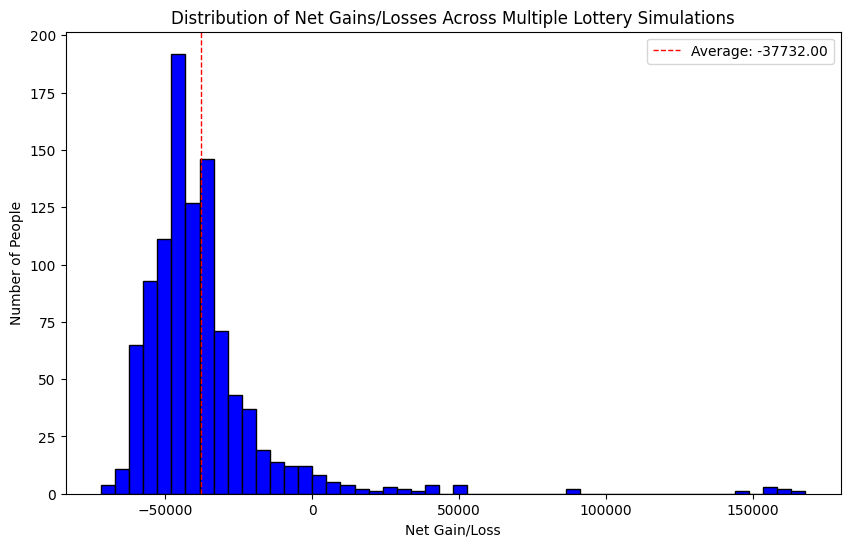

In [30]:
n_simulations_per_person = 1000
n_people = 1000

results = []

for _ in range(n_people):
    total_gain = 0
    for _ in range(n_simulations_per_person):
        total_prizes = 0
        for prize, prob in zip(prizes, probabilities):
            if np.random.random() < prob:
                total_prizes += prize
        net_gain = total_prizes - ticket_price
        total_gain += net_gain
    results.append(total_gain)

plt.figure(figsize=(10, 6))
plt.hist(results, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Net Gains/Losses Across Multiple Lottery Simulations')
plt.xlabel('Net Gain/Loss')
plt.ylabel('Number of People')
plt.axvline(np.mean(results), color='red', linestyle='dashed', linewidth=1, label=f'Average: {np.mean(results):.2f}')
plt.legend()
plt.show()


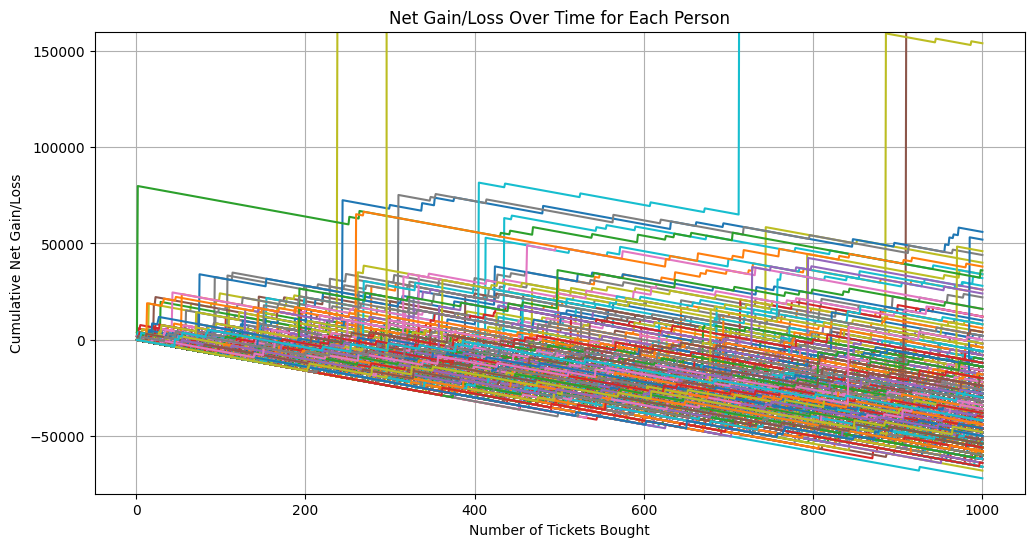

In [12]:
n_simulations_per_person = 1000 #จำนวนครั้งที่ซื้อ
n_people = 1000 #จำนวนคน

df = pd.DataFrame(index=range(1, n_simulations_per_person + 1))

all_results = []
final_results = []
for i in range(n_people):
    cumulative_gains = []
    total_gain = 0
    for _ in range(n_simulations_per_person):
        total_prizes = 0
        for prize, prob in zip(prizes, probabilities):
            if np.random.random() < prob:
                total_prizes += prize
        net_gain = total_prizes - ticket_price
        total_gain += net_gain
        cumulative_gains.append(total_gain)
    all_results.append(cumulative_gains)
    final_results.append(total_gain)
    
df = pd.DataFrame(final_results, columns=['Final_Gain_Loss'], index=[f'Person_{i}' for i in range(1, n_people + 1)])

plt.figure(figsize=(12, 6))

for i, gains in enumerate(all_results):
    plt.plot(range(1, n_simulations_per_person + 1), gains, label=f'Person {i + 1}')

center_value = -40000
y_min = center_value - 40000    
y_max = center_value + 200000
plt.ylim(y_min, y_max)

plt.title('Net Gain/Loss Over Time for Each Person')
plt.xlabel('Number of Tickets Bought')
plt.ylabel('Cumulative Net Gain/Loss')
plt.grid(True)
plt.show()

In [27]:
winner = len(df[df['Final_Gain_Loss']>=0])
loser = len(df[df['Final_Gain_Loss']<0])

print(f"จำนวนคนที่ได้กำไร = {winner} คน\n จำนวนคนที่ขาดทุน = {loser} คน")

จำนวนคนที่ได้กำไร = 38 คน
 จำนวนคนที่ขาดทุน = 962 คน


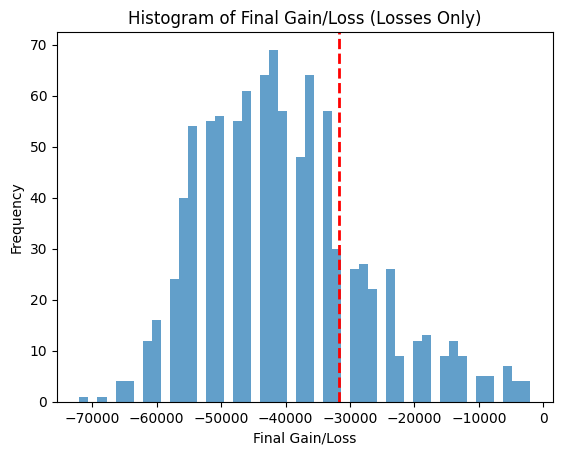

In [34]:
import matplotlib.pyplot as plt

ax = df.query('Final_Gain_Loss < 0').plot(kind='hist', bins=50, alpha=0.7)

mean_value = df['Final_Gain_Loss'].mean()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'{mean_value:.2f}')

plt.title('Histogram of Final Gain/Loss (Losses Only)')
plt.xlabel('Final Gain/Loss')
plt.ylabel('Frequency')
ax.get_legend().remove()

plt.show()

In [39]:
df['Final_Gain_Loss'].describe().apply(lambda x: format(x, 'f'))

count       1000.000000
mean      -31676.000000
std       190547.956031
min       -72000.000000
25%       -50000.000000
50%       -42000.000000
75%       -32000.000000
max      5948000.000000
Name: Final_Gain_Loss, dtype: object

In [36]:
df['Final_Gain_Loss'].mean()/1000

-31.676

In [50]:
sum_ticket_value = 0
for i in range(len(prizes)):
    sum_ticket_value += prizes[i]*probabilities[i]

print(f"มูลค่าที่แท้จริงของสลากหนึ่งใบ = {int(sum_ticket_value)} บาท")

มูลค่าที่แท้จริงของสลากหนึ่งใบ = 48 บาท
